In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
import seaborn as sns


import pandas as pd

In [2]:
csv = pd.read_csv('PLOTS - Sheet5.csv')

In [3]:
csv

,Hidden Dims,ViT-ALIGN-Rand,ViT-ALIGN-NRL,ViT-JFT-Rand,ViT-JFT-NRL,JFT ViT NRL E
0,12,11.90,43.57,27.07,53.61,51.54
1,24,33.35,56.44,48.64,62.80,62.40
2,48,51.32,62.33,63.58,67.24,66.89
3,96,61.82,65.72,68.56,69.74,68.80
4,192,66.71,67.00,71.32,71.34,70.41
5,384,67.65,67.70,71.67,71.73,71.18
6,768,68.00,67.85,72.10,71.85,71.31


ViT-JFT-NRL
ViT-ALIGN-NRL
JFT ViT NRL E
ViT-JFT-Rand
ViT-ALIGN-Rand


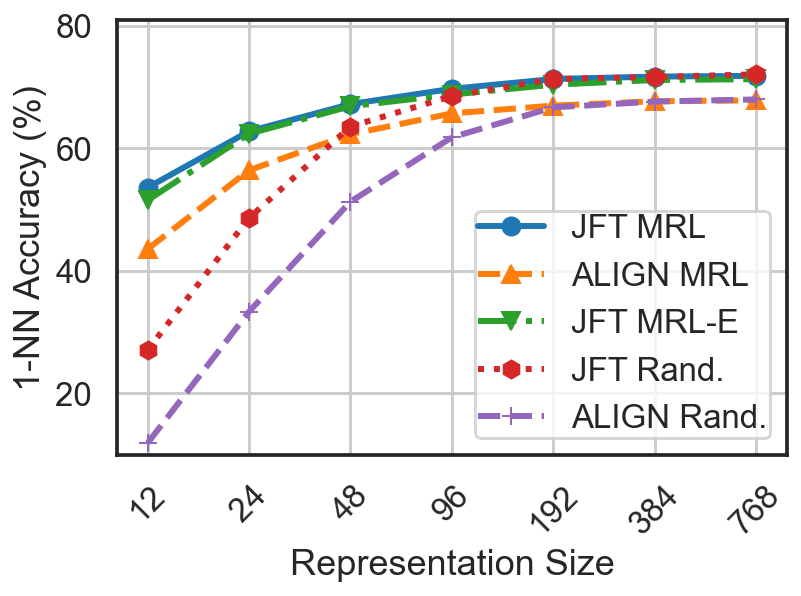

In [8]:
import numpy as np

names = {
    "ViT-JFT-NRL": "JFT MRL",
    "ViT-ALIGN-NRL": "ALIGN MRL",
    "JFT ViT NRL E": "JFT MRL-E",
    "ViT-JFT-Rand": "JFT Rand.",
    "ViT-ALIGN-Rand": "ALIGN Rand.",
}
sns.set_context('talk')
sns.set_style("white")
linestyles = ['-', '--', '-.', ':', "--", "-", ":", "-."]
markers = ['o', '^', 'v', 'h', '+', 'x', 'D', '*']

for i, ((name, mapping), linestyle, m) in enumerate(zip(names.items(), linestyles, markers)):
    print(name)
    if name == "ViT-ALIGN-MRL":
        zorder = 30
    elif name=="ViT-JFT-MRL":
        zorder = 25
    elif name=="ViT-JFT-MRL-E":
        zorder = 20
    else:
        zorder = 2
    plt.plot(
        csv["Hidden Dims"], csv[name], label=mapping, marker=m, linewidth=3, linestyle=linestyle, zorder=zorder
    )

plt.ylim([10, 81])
plt.xscale("log")
plt.xticks(csv["Hidden Dims"], csv["Hidden Dims"], rotation=45)
plt.xlabel("Representation Size")
plt.ylabel("1-NN Accuracy (%)")
plt.grid()
plt.legend(borderpad=0.1)

plt.savefig("ViT_knn-classification-dim-x-acc.pdf", bbox_inches="tight")